In [1]:
from array import array
import math
import numpy as np
from scipy.fftpack import fft
import random

In [2]:
fs = 0.2
phis = math.pi/4.0
tseries = 50.0

random.seed(1)

In [3]:
N_max = 513  #power of 2 plus 1
N_start = 32 #power of 2
#N_max = 513  #power of 2 plus 1
#N_start = 460 #power of 2
#N_max = 100  #power of 2 plus 1
#N_start = 60 #power of 2
btime = np.zeros(N_max)
ptime = np.zeros(N_max)
time_ratio = np.zeros(N_max)
Npoints = np.zeros(N_max)

for N in range(N_start,N_max):
    
    Npoints[N] = N

    tau = tseries/N
    t = np.zeros(N)
    y = np.zeros(N)
    f = np.zeros(N)

    ytReal = np.zeros(N)
    ytImag = np.zeros(N)

    yfftReal = np.zeros(N)
    yfftImag = np.zeros(N)

    power = np.zeros(N)
    powerfft = np.zeros(N)
    
    for i in range(N):
        t[i]=i*tau
        y[i]=(math.sin(2.0*math.pi*t[i]*fs+phis))
        f[i]=i/(N*tau)
    
    from timeit import default_timer as timer

    start = timer()

    twopiN=-2.0*math.pi/N
    epsilon = 0.001
    for k in range(N):
        ytReal[k]=epsilon
        ytImag[k]=epsilon
        for j in range(N):
            ytReal[k] = ytReal[k] + 1.0/N*y[j]*math.cos(twopiN*j*k)
            ytImag[k] = ytImag[k] + 1.0/N*y[j]*math.sin(twopiN*j*k)   
        power[k]=2*(ytReal[k]**2+ytImag[k]**2)
    
    end = timer()
    btime[N] = end-start
    #print ("Brash: ",btime[N])
        
    start = timer()
    yfft = fft(y)
    yfftReal = 1.0/N*yfft.real
    yfftImag = 1.0/N*yfft.imag
    powerfft = 2.0/(N*N)*abs(yfft)**2
    end = timer()
    ptime[N]=end-start
    time_ratio[N] = btime[N]/ptime[N]
    
    #print ("Python: ",ptime[N])
    print("Ratio = ",N,btime[N]/ptime[N])

Ratio =  32 7.297429939057866
Ratio =  33 4.270011909605745
Ratio =  34 8.779138813235477
Ratio =  35 25.400393569707546
Ratio =  36 18.623275750402534
Ratio =  37 13.983512539799996
Ratio =  38 26.29926458102495
Ratio =  39 10.28961000974148
Ratio =  40 5.42888524942903
Ratio =  41 6.8435412029578515
Ratio =  42 36.42167057625232
Ratio =  43 25.27971178824745
Ratio =  44 42.837129173312874
Ratio =  45 39.690637392760294
Ratio =  46 23.6507821028379
Ratio =  47 57.461489170207656
Ratio =  48 64.94009403762882
Ratio =  49 74.51833716867687
Ratio =  50 40.64375355576548
Ratio =  51 78.14441646304638
Ratio =  52 83.94367293758222
Ratio =  53 78.15513130995822
Ratio =  54 78.89084900828193
Ratio =  55 87.02263895662085
Ratio =  56 136.84840550841216
Ratio =  57 112.88283490566725
Ratio =  58 44.222501247164324
Ratio =  59 94.99986148783046
Ratio =  60 107.83539412797217
Ratio =  61 69.08280486658307
Ratio =  62 96.0279060952727
Ratio =  63 38.18646444970191
Ratio =  64 67.76912259272716
Ra

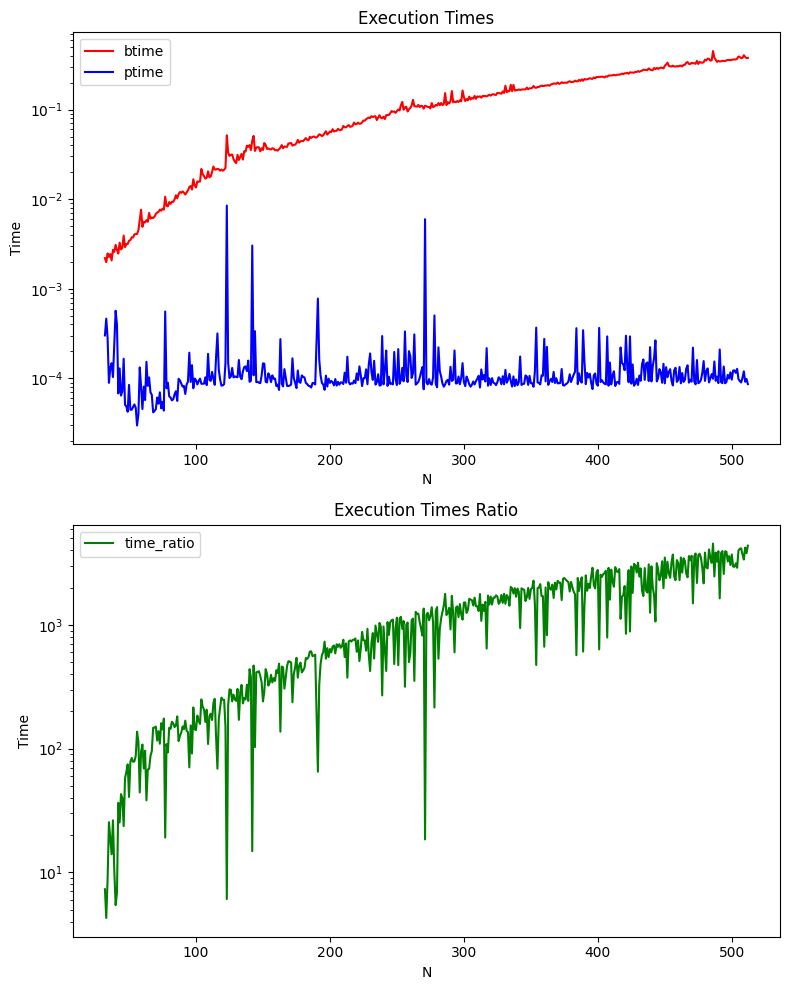

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Execution Times
ax1.set_yscale('log')
ax1.plot(Npoints[N_start:N_max], btime[N_start:N_max], linestyle='-', color='red', label='btime')
ax1.plot(Npoints[N_start:N_max], ptime[N_start:N_max], linestyle='-', color='blue', label='ptime')
ax1.set_xlabel('N')
ax1.set_ylabel('Time')
ax1.set_title('Execution Times')
ax1.legend()

# Execution Times Ratio
ax2.set_yscale('log')
ax2.plot(Npoints[N_start:N_max], time_ratio[N_start:N_max], linestyle='-', color='green', label='time_ratio')
ax2.set_xlabel('N')
ax2.set_ylabel('Time')
ax2.set_title('Execution Times Ratio')
ax2.legend()

plt.tight_layout()
plt.show()


In [8]:
lowlist = [461,463,467,479,487,491,499,503,509]
highlist = [464,468,480,484,490,504,510,512]

In [9]:
def get_factors(x):
    # This function takes a number and prints the factors

    factors = []
    for i in range(1, x + 1):
        if x % i == 0:
            factors.append(i)
            
    return factors
    

In [10]:
for x in lowlist:
    print (x,get_factors(x))

461 [1, 461]
463 [1, 463]
467 [1, 467]
479 [1, 479]
487 [1, 487]
491 [1, 491]
499 [1, 499]
503 [1, 503]
509 [1, 509]


In [11]:
for x in highlist:
    print (x,get_factors(x))

464 [1, 2, 4, 8, 16, 29, 58, 116, 232, 464]
468 [1, 2, 3, 4, 6, 9, 12, 13, 18, 26, 36, 39, 52, 78, 117, 156, 234, 468]
480 [1, 2, 3, 4, 5, 6, 8, 10, 12, 15, 16, 20, 24, 30, 32, 40, 48, 60, 80, 96, 120, 160, 240, 480]
484 [1, 2, 4, 11, 22, 44, 121, 242, 484]
490 [1, 2, 5, 7, 10, 14, 35, 49, 70, 98, 245, 490]
504 [1, 2, 3, 4, 6, 7, 8, 9, 12, 14, 18, 21, 24, 28, 36, 42, 56, 63, 72, 84, 126, 168, 252, 504]
510 [1, 2, 3, 5, 6, 10, 15, 17, 30, 34, 51, 85, 102, 170, 255, 510]
512 [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
